In [ ]:
#TODO note à moi-même : regarder les fonctions compare.py qui existent déjà ds mangaki
#revoir ce qu'est pdist et cdist; les différences

In [ ]:
#test pr 20 éléments (prendre pê moins que 70 pr rg matrice svd car tourne longtemps 
#mais moins de chance de tomber sur une singular matrix....)

In [1]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=70

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()
svd =MangakiSVD(rang_svd)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)

Computing M: (1710 × 8347)
fill and center matrix [760 ms]
Shapes (1710, 70) (70,) (70, 8347)
factor matrix [114104 ms]


In [52]:
#copie_SVD=svd.VT.copy()
#####################################
####################################
####################################
nb_points=20
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)
sampled_items = sample_k(items, similarity, nb_points)

In [53]:
sampled_items



array([1156, 1553, 2279, 2890, 3257, 3477, 3621, 4201, 4226, 4295, 5272,
       5829, 6055, 6588, 6736, 6981, 7000, 7081, 7854, 7958])

In [54]:
#liste de 10 éléments choisis aléatoirement
import random

uniform_items = list(range(similarity.shape[0]))
random.shuffle(uniform_items)
uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

(pdist(svd.VT[:,sampled_items].T)).sum()

12.719211207570869

In [55]:
uniform_items 



[5168,
 6334,
 8002,
 6173,
 5517,
 3951,
 2260,
 745,
 5988,
 4824,
 1314,
 1611,
 1487,
 2869,
 6643,
 1745,
 7611,
 3574,
 5410,
 7303]

In [56]:
(pdist(svd.VT[:,uniform_items].T)).sum()
#sample
#uniforms
#compare

8.2865590321524714

<IPython.core.display.Javascript object>


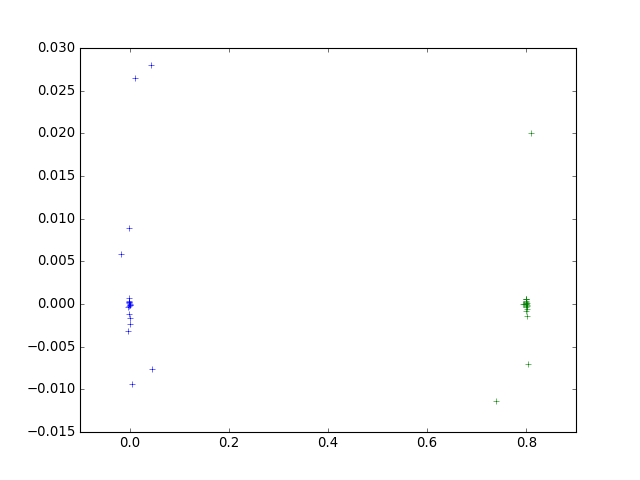

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '+b')
plt.plot(svd.VT[0, uniform_items]+0.8, svd.VT[1, uniform_items], '+g')
# ! translation des pts choisis aléatoirement pr miexu voir les clusters, illisible graphiquement sinon

In [51]:
plt.text(0, 0.02, 'avec DPP')
plt.text(0.6, 0.02, 'sans DPP (aléatoire)')

In [27]:
#autre test : faire une moyenne de plusieurs tests successifs
#il serait peut-être bien de vérifier que la matrice est inversible ou alors utiliser ratings directement au lieu de svd.VT
# iteration=0
#tant que iteration !=10, si similarity inversible (utiliser sample_k et iteration++)



In [26]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=20

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd =MangakiSVD(rang_svd)
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)


Computing M: (1710 × 8347)
fill and center matrix [719 ms]
Shapes (1710, 20) (20,) (20, 8347)
factor matrix [38480 ms]


In [28]:
#####################################
####################################
####################################
nb_points=10
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)


In [29]:
#liste de 10 éléments choisis aléatoirement

uniform_items = list(range(similarity.shape[0]))
distance_sample=[]
distance_uniform=[]
for i in range(10):
    sampled_items = sample_k(items, similarity, nb_points)
    random.shuffle(uniform_items)
    uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

    distance_sample.append((pdist(svd.VT[:,sampled_items].T)).sum())
    distance_uniform.append((pdist(svd.VT[:,uniform_items].T)).sum())

LinAlgError: Singular matrix

157.90444507842381

# Dispersion statistique : diamètre d'ordre r

In [ ]:
#Utilisation de diamètre :   
#https://fr.wikipedia.org/wiki/Dispersion_statistique
#https://msh.revues.org/3553?file=1

essai, exemple : diamètre d'ordre 1

In [31]:
sampled_items


array([ 217, 1443, 2578, 2899, 3630, 3643, 3733, 3977, 4157, 4546, 4875,
       5144, 5454, 5778, 6459, 7045, 7207, 7356, 8055, 8277])

In [60]:
uniform_items


[5168,
 6334,
 8002,
 6173,
 5517,
 3951,
 2260,
 745,
 5988,
 4824,
 1314,
 1611,
 1487,
 2869,
 6643,
 1745,
 7611,
 3574,
 5410,
 7303]

In [74]:
#nb_points est défini
#pdist(X, euclidian), cdist ? 


distance_sample = squareform(pdist(svd.VT[:,sampled_items].T))
distance_uniform = squareform(pdist(svd.VT[:,uniform_items].T))


In [ ]:
cefficient_D1=2/(len(sampled_items))